In [127]:
import geopy.distance
import pandas as pd
import numpy as np
import numpy.typing as npt
import networkx as nx

from itertools import combinations, cycle

from matplotlib import pyplot as plt

In [128]:
def load_cities() -> (pd.DataFrame, npt.NDArray):
    cities = pd.read_csv('italy.csv', header=None, names=['name', 'lat', 'lon'])
    
    dist_matrix = np.zeros((len(cities), len(cities)))
    
    for city1, city2 in combinations(cities.itertuples(), 2):
        distance = geopy.distance.geodesic(
            (city1.lat, city1.lon), (city2.lat, city2.lon)
        ).km
    
        dist_matrix[city1.Index, city2.Index] = dist_matrix[city2.Index, city1.Index] = distance
    
    return cities, dist_matrix

CITIES, DIST_MATRIX = load_cities()

def tsp_cost(path: list[int]) -> float:
    tot_cost = 0
    for city1, city2 in zip(path, path[1:]):
        tot_cost += DIST_MATRIX[city1, city2]

    return tot_cost

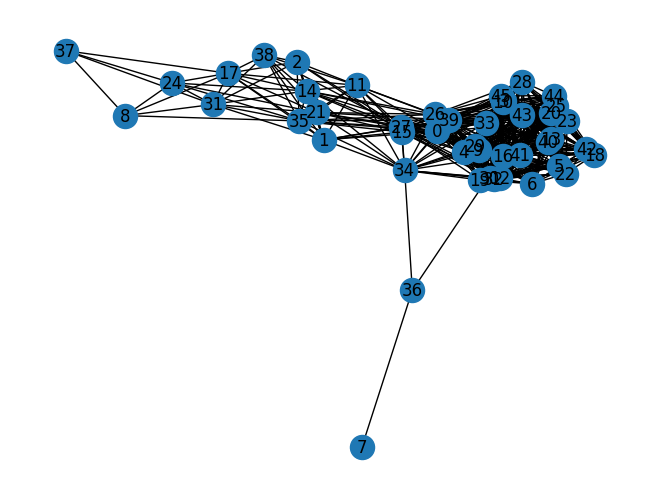

In [129]:
## We can use NetworkX implementations of the Dijkstra and Bellman-Ford algorithms

graph = nx.Graph()

for c1, c2 in combinations(CITIES.itertuples(), 2):
    if DIST_MATRIX[c1.Index, c2.Index] <= np.median(DIST_MATRIX.reshape(1, -1)):
        graph.add_edge(c1.Index, c2.Index, weight=DIST_MATRIX[c1.Index, c2.Index])

nx.draw(graph, with_labels=True)
plt.show()

In [130]:
# This example calculates the path between the nodes in the graph with the fewest connections and highest distance between them, just to verify the algorithm on a more complex path.

dijkstra_path = nx.shortest_path(graph, source=7, target=37, weight='weight', method='dijkstra')
bellman_ford_path = nx.shortest_path(graph, source=7, target=37, weight='weight', method='bellman-ford')

print(dijkstra_path, tsp_cost(dijkstra_path))
print(bellman_ford_path, tsp_cost(bellman_ford_path))

[7, 36, 34, 14, 17, 37] 1157.3384611191036
[7, 36, 34, 14, 17, 37] 1157.3384611191036
